In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_1=pd.read_csv('ENB2012_data.csv')

In [3]:
df_1.shape

(768, 10)

In [4]:
df_1.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

Interpolation Between Random Rows

You can create new rows as weighted averages of existing rows:

In [5]:
n_new = 2000 - len(df_1)
rows = []

for _ in range(n_new):
    i, j = np.random.choice(len(df_1), 2, replace=False)
    alpha = np.random.rand()
    new_row = alpha * df_1.iloc[i] + (1 - alpha) * df_1.iloc[j]
    rows.append(new_row)

df_interpolated = pd.DataFrame(rows, columns=df_1.columns)
df_upsampled = pd.concat([df_1, df_interpolated], ignore_index=True)

print(df_upsampled.shape)


(2000, 10)


In [6]:
df_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      2000 non-null   float64
 1   X2      2000 non-null   float64
 2   X3      2000 non-null   float64
 3   X4      2000 non-null   float64
 4   X5      2000 non-null   float64
 5   X6      2000 non-null   float64
 6   X7      2000 non-null   float64
 7   X8      2000 non-null   float64
 8   Y1      2000 non-null   float64
 9   Y2      2000 non-null   float64
dtypes: float64(10)
memory usage: 156.4 KB


In [7]:
df_upsampled.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [8]:
df_upsampled.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


In [9]:
df_upsampled.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.764452,671.433749,317.103629,177.165060,5.232890,3.496815,0.237964,2.805138,22.235505,24.444073
std,0.093836,78.446099,38.731650,40.273308,1.570760,1.006186,0.116940,1.376204,8.997038,8.470300
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000,6.010000,10.900000
25%,0.690000,612.500000,294.000000,145.794462,3.500000,2.760706,0.112618,1.835247,14.356669,16.567500
50%,0.755001,672.910567,318.500000,178.606321,5.249039,3.497853,0.250000,3.000000,20.687966,23.237388
75%,0.824522,735.000000,343.000000,220.500000,7.000000,4.199966,0.349547,4.000000,29.480010,31.338002
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000,43.100000,48.030000


In [10]:
df_upsampled.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [11]:
df_upsampled.duplicated().sum()

0

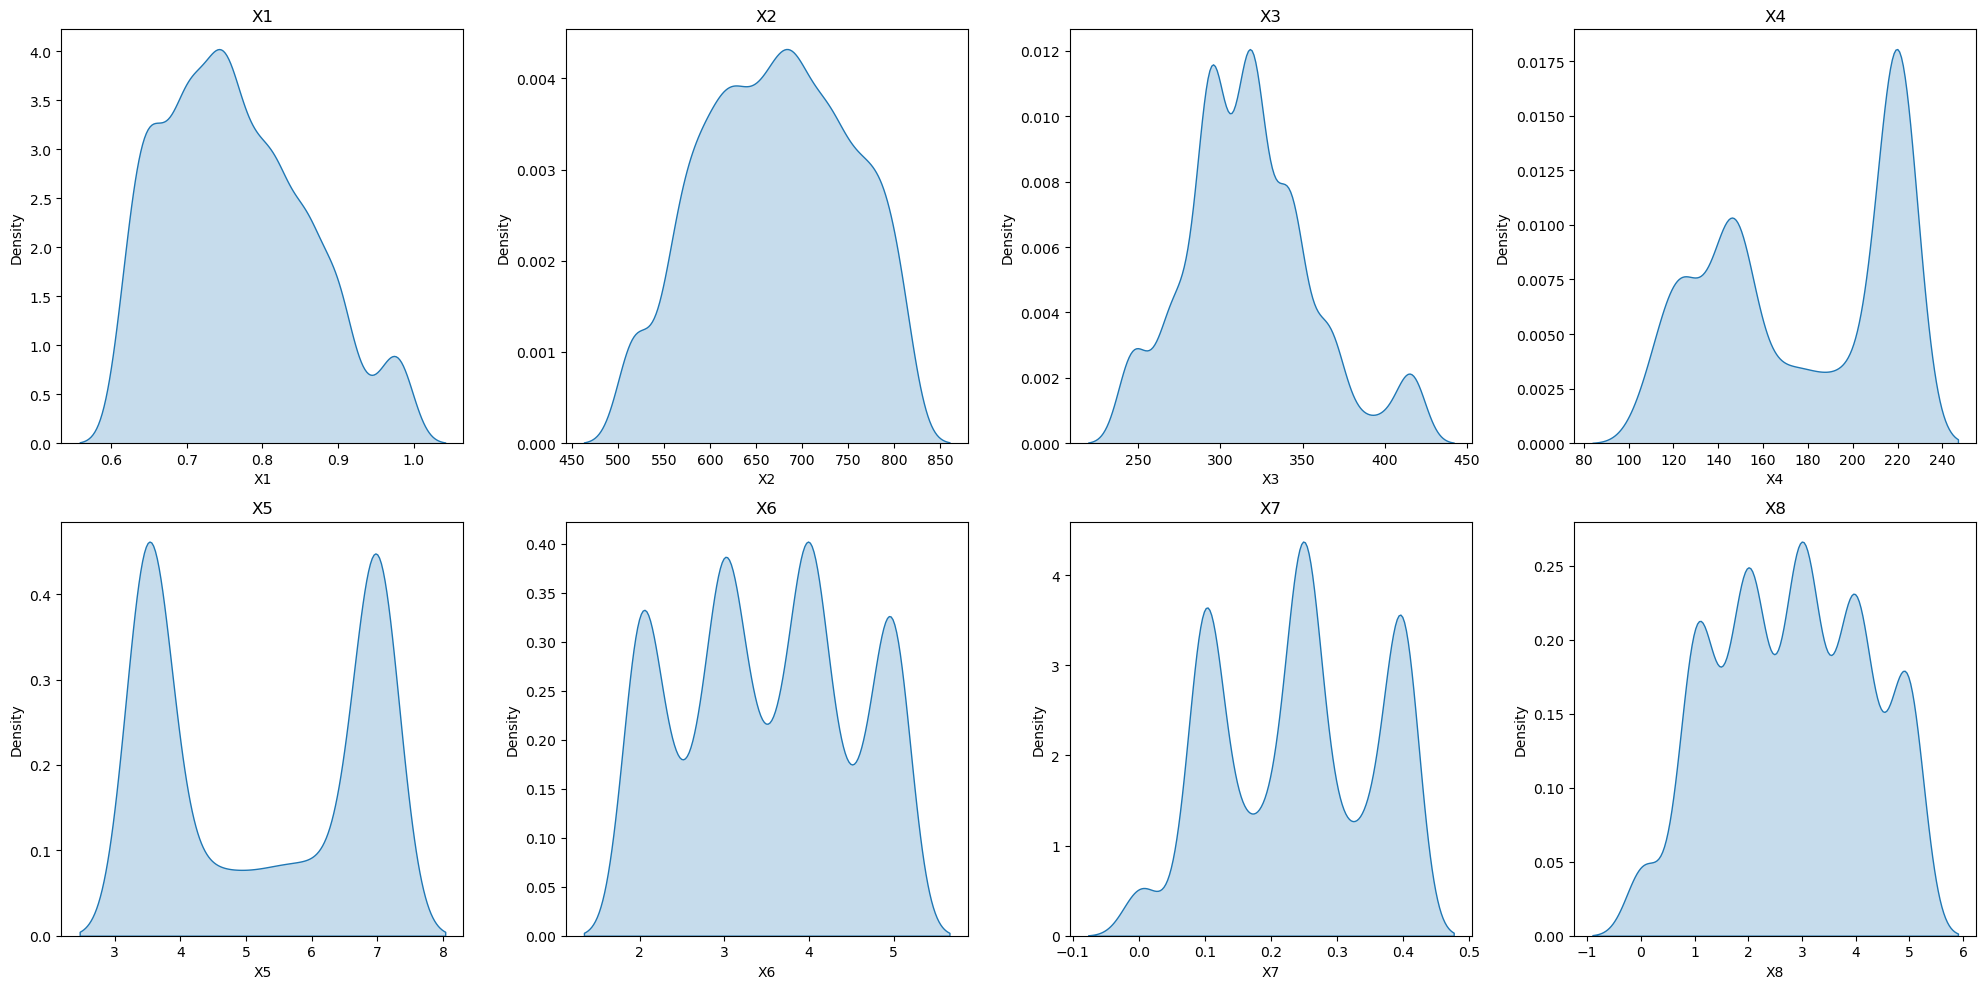

In [12]:
plt.figure(figsize=(20,10))

for i, col in enumerate(['X1','X2','X3','X4','X5','X6','X7','X8'], 1):
    plt.subplot(2,4,i)
    sns.kdeplot(df_upsampled[col], fill=True)
    plt.title(col)

plt.tight_layout()
plt.show()

In [13]:
df_upsampled.skew()

X1    0.441925
X2   -0.086093
X3    0.527920
X4   -0.171190
X5    0.019532
X6   -0.001959
X7   -0.078380
X8   -0.049602
Y1    0.372474
Y2    0.416122
dtype: float64

In [14]:
df_upsampled['X1']=np.log(df_upsampled['X1'])
df_upsampled['X3']=np.log1p(df_upsampled['X3'])

In [15]:
df_upsampled.skew()

X1    0.224210
X2   -0.086093
X3    0.162514
X4   -0.171190
X5    0.019532
X6   -0.001959
X7   -0.078380
X8   -0.049602
Y1    0.372474
Y2    0.416122
dtype: float64

In [16]:
df_upsampled.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000,-0.997150,-0.192591,-0.873399,0.843260,0.010906,-0.012635,-0.015656,0.647752,0.661057
X2,-0.997150,1.000000,0.182993,0.881640,-0.861217,-0.012262,0.014817,0.015322,-0.668916,-0.683667
X3,-0.192591,0.182993,1.000000,-0.300892,0.291750,0.015588,0.010873,0.030281,0.459525,0.433298
X4,-0.873399,0.881640,-0.300892,1.000000,-0.973532,-0.019403,0.009135,0.000938,-0.869607,-0.870535
X5,0.843260,-0.861217,0.291750,-0.973532,1.000000,0.023393,-0.011503,0.002885,0.894337,0.898858
X6,0.010906,-0.012262,0.015588,-0.019403,0.023393,1.000000,-0.000501,-0.029503,0.016217,0.037150
X7,-0.012635,0.014817,0.010873,0.009135,-0.011503,-0.000501,1.000000,0.187200,0.250680,0.198129
X8,-0.015656,0.015322,0.030281,0.000938,0.002885,-0.029503,0.187200,1.000000,0.090032,0.056095
Y1,0.647752,-0.668916,0.459525,-0.869607,0.894337,0.016217,0.250680,0.090032,1.000000,0.976420
Y2,0.661057,-0.683667,0.433298,-0.870535,0.898858,0.037150,0.198129,0.056095,0.976420,1.000000


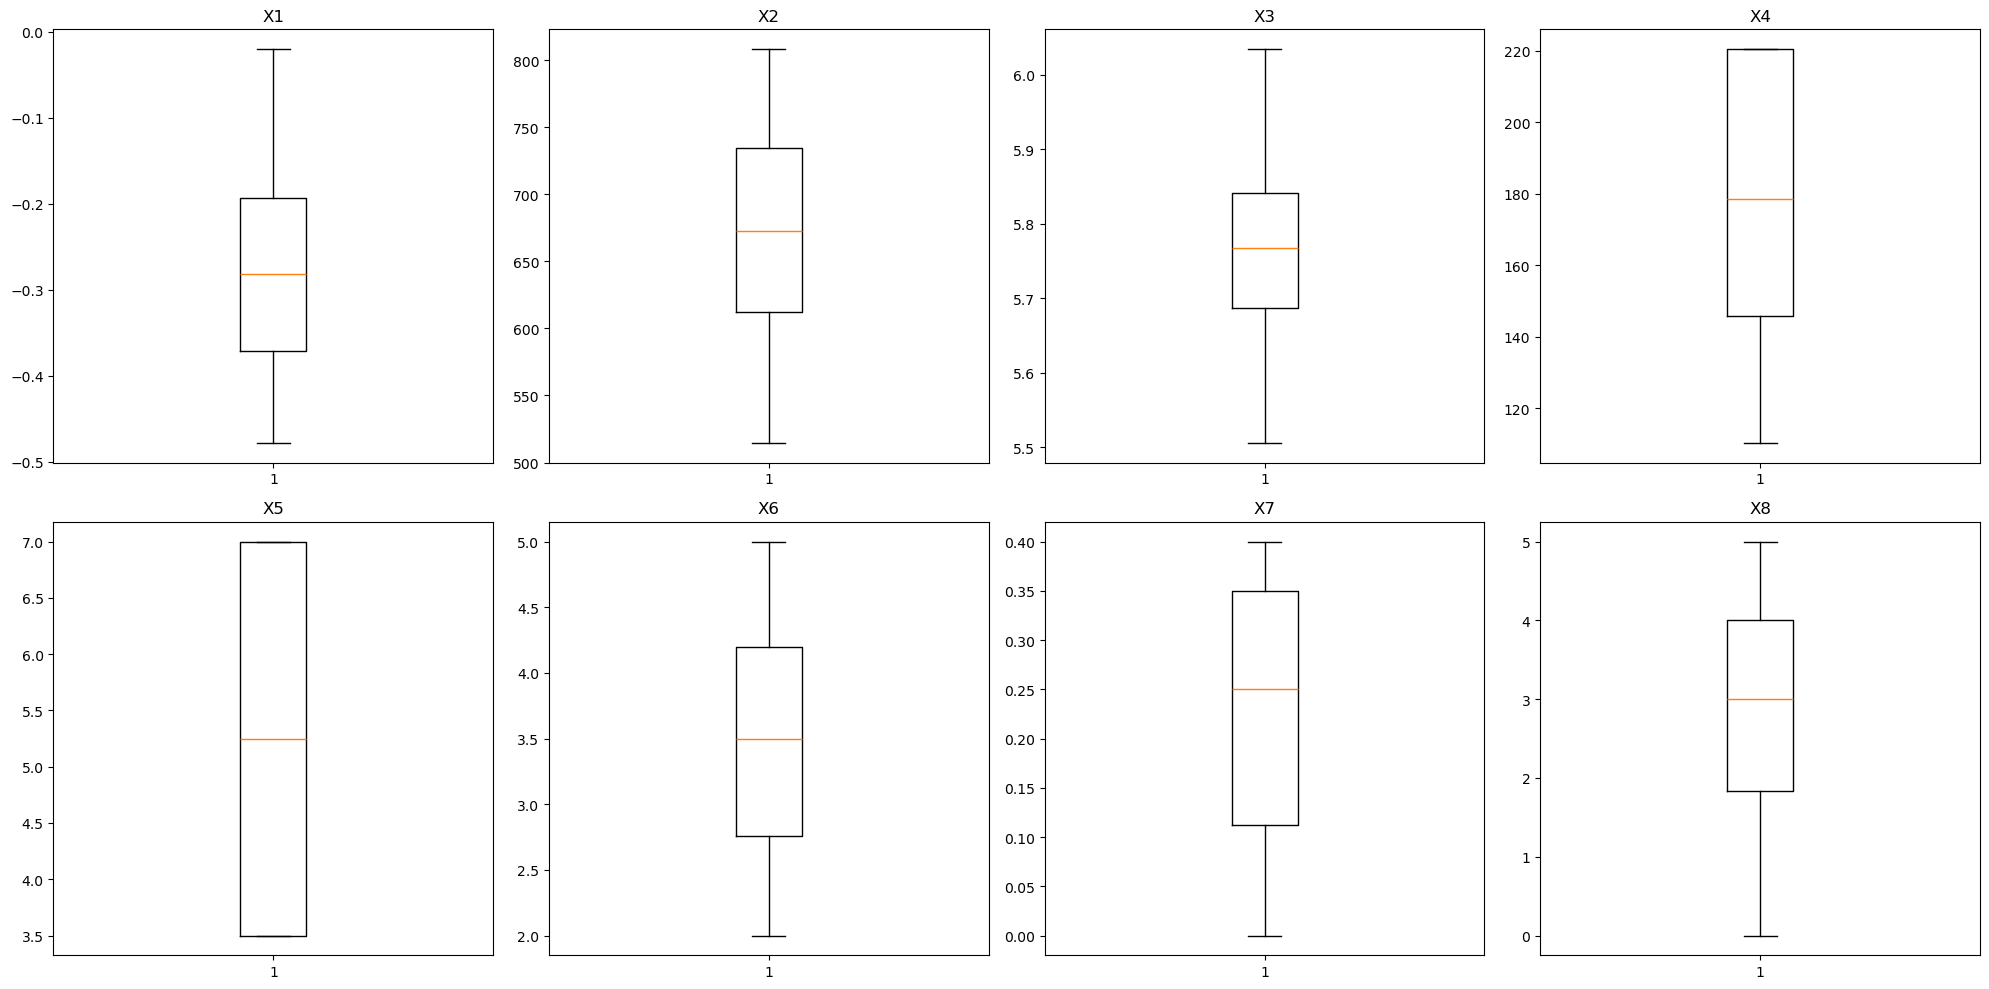

In [17]:
plt.figure(figsize=(20,10))

for i, col in enumerate(['X1','X2','X3','X4','X5','X6','X7','X8'], 1):
    plt.subplot(2,4,i)
    plt.boxplot(df_upsampled[col])
    plt.title(col)

plt.tight_layout()
plt.show()

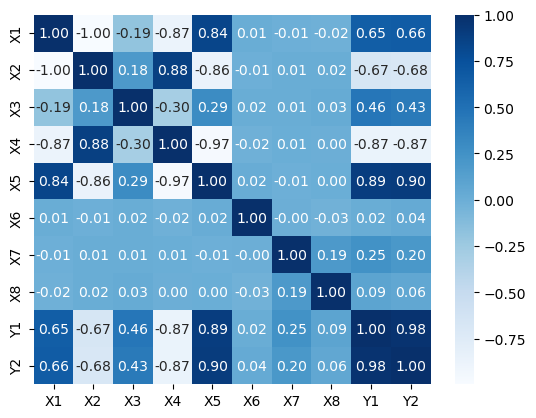

In [18]:
sns.heatmap(df_upsampled.corr(),annot=True,fmt=".2f",cmap='Blues')
plt.show()

Specifically:
X1 Relative Compactness
X2 Surface Area
X3 Wall Area
X4 Roof Area
X5 Overall Height
X6 Orientation
X7 Glazing Area
X8 Glazing Area Distribution
y1 Heating Load
y2 Cooling Load

In [19]:
df_upsampled=df_upsampled.drop(columns=['X2','X4'])

In [20]:
df_upsampled.head()

,X1,X3,X5,X6,X7,X8,Y1,Y2
0,-0.020203,5.686975,7.0,2.0,0.0,0.0,15.55,21.33
1,-0.020203,5.686975,7.0,3.0,0.0,0.0,15.55,21.33
2,-0.020203,5.686975,7.0,4.0,0.0,0.0,15.55,21.33
3,-0.020203,5.686975,7.0,5.0,0.0,0.0,15.55,21.33
4,-0.105361,5.766757,7.0,2.0,0.0,0.0,20.84,28.28


In [21]:
df_upsampled.shape

(2000, 8)

In [22]:
df_upsampled.head()

,X1,X3,X5,X6,X7,X8,Y1,Y2
0,-0.020203,5.686975,7.0,2.0,0.0,0.0,15.55,21.33
1,-0.020203,5.686975,7.0,3.0,0.0,0.0,15.55,21.33
2,-0.020203,5.686975,7.0,4.0,0.0,0.0,15.55,21.33
3,-0.020203,5.686975,7.0,5.0,0.0,0.0,15.55,21.33
4,-0.105361,5.766757,7.0,2.0,0.0,0.0,20.84,28.28


In [23]:
df_upsampled.columns

Index(['X1', 'X3', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [24]:
df_upsampled.to_csv('cleaned_dataset.csv',index=False)